In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model


In [130]:
ImageGenerator = ImageDataGenerator(rescale=1./255,shear_range=0.1,zoom_range=0.3)
image_Generator=ImageDataGenerator(rescale=1./255)

In [131]:
train_data=ImageGenerator.flow_from_directory('train',target_size=(500,500),batch_size=50,class_mode='binary',color_mode='grayscale')
test_data=ImageGenerator.flow_from_directory('test',target_size=(500,500),batch_size=50,class_mode='binary',color_mode='grayscale')

Found 3585 images belonging to 2 classes.
Found 468 images belonging to 2 classes.


In [132]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(500,500,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


C:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [133]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

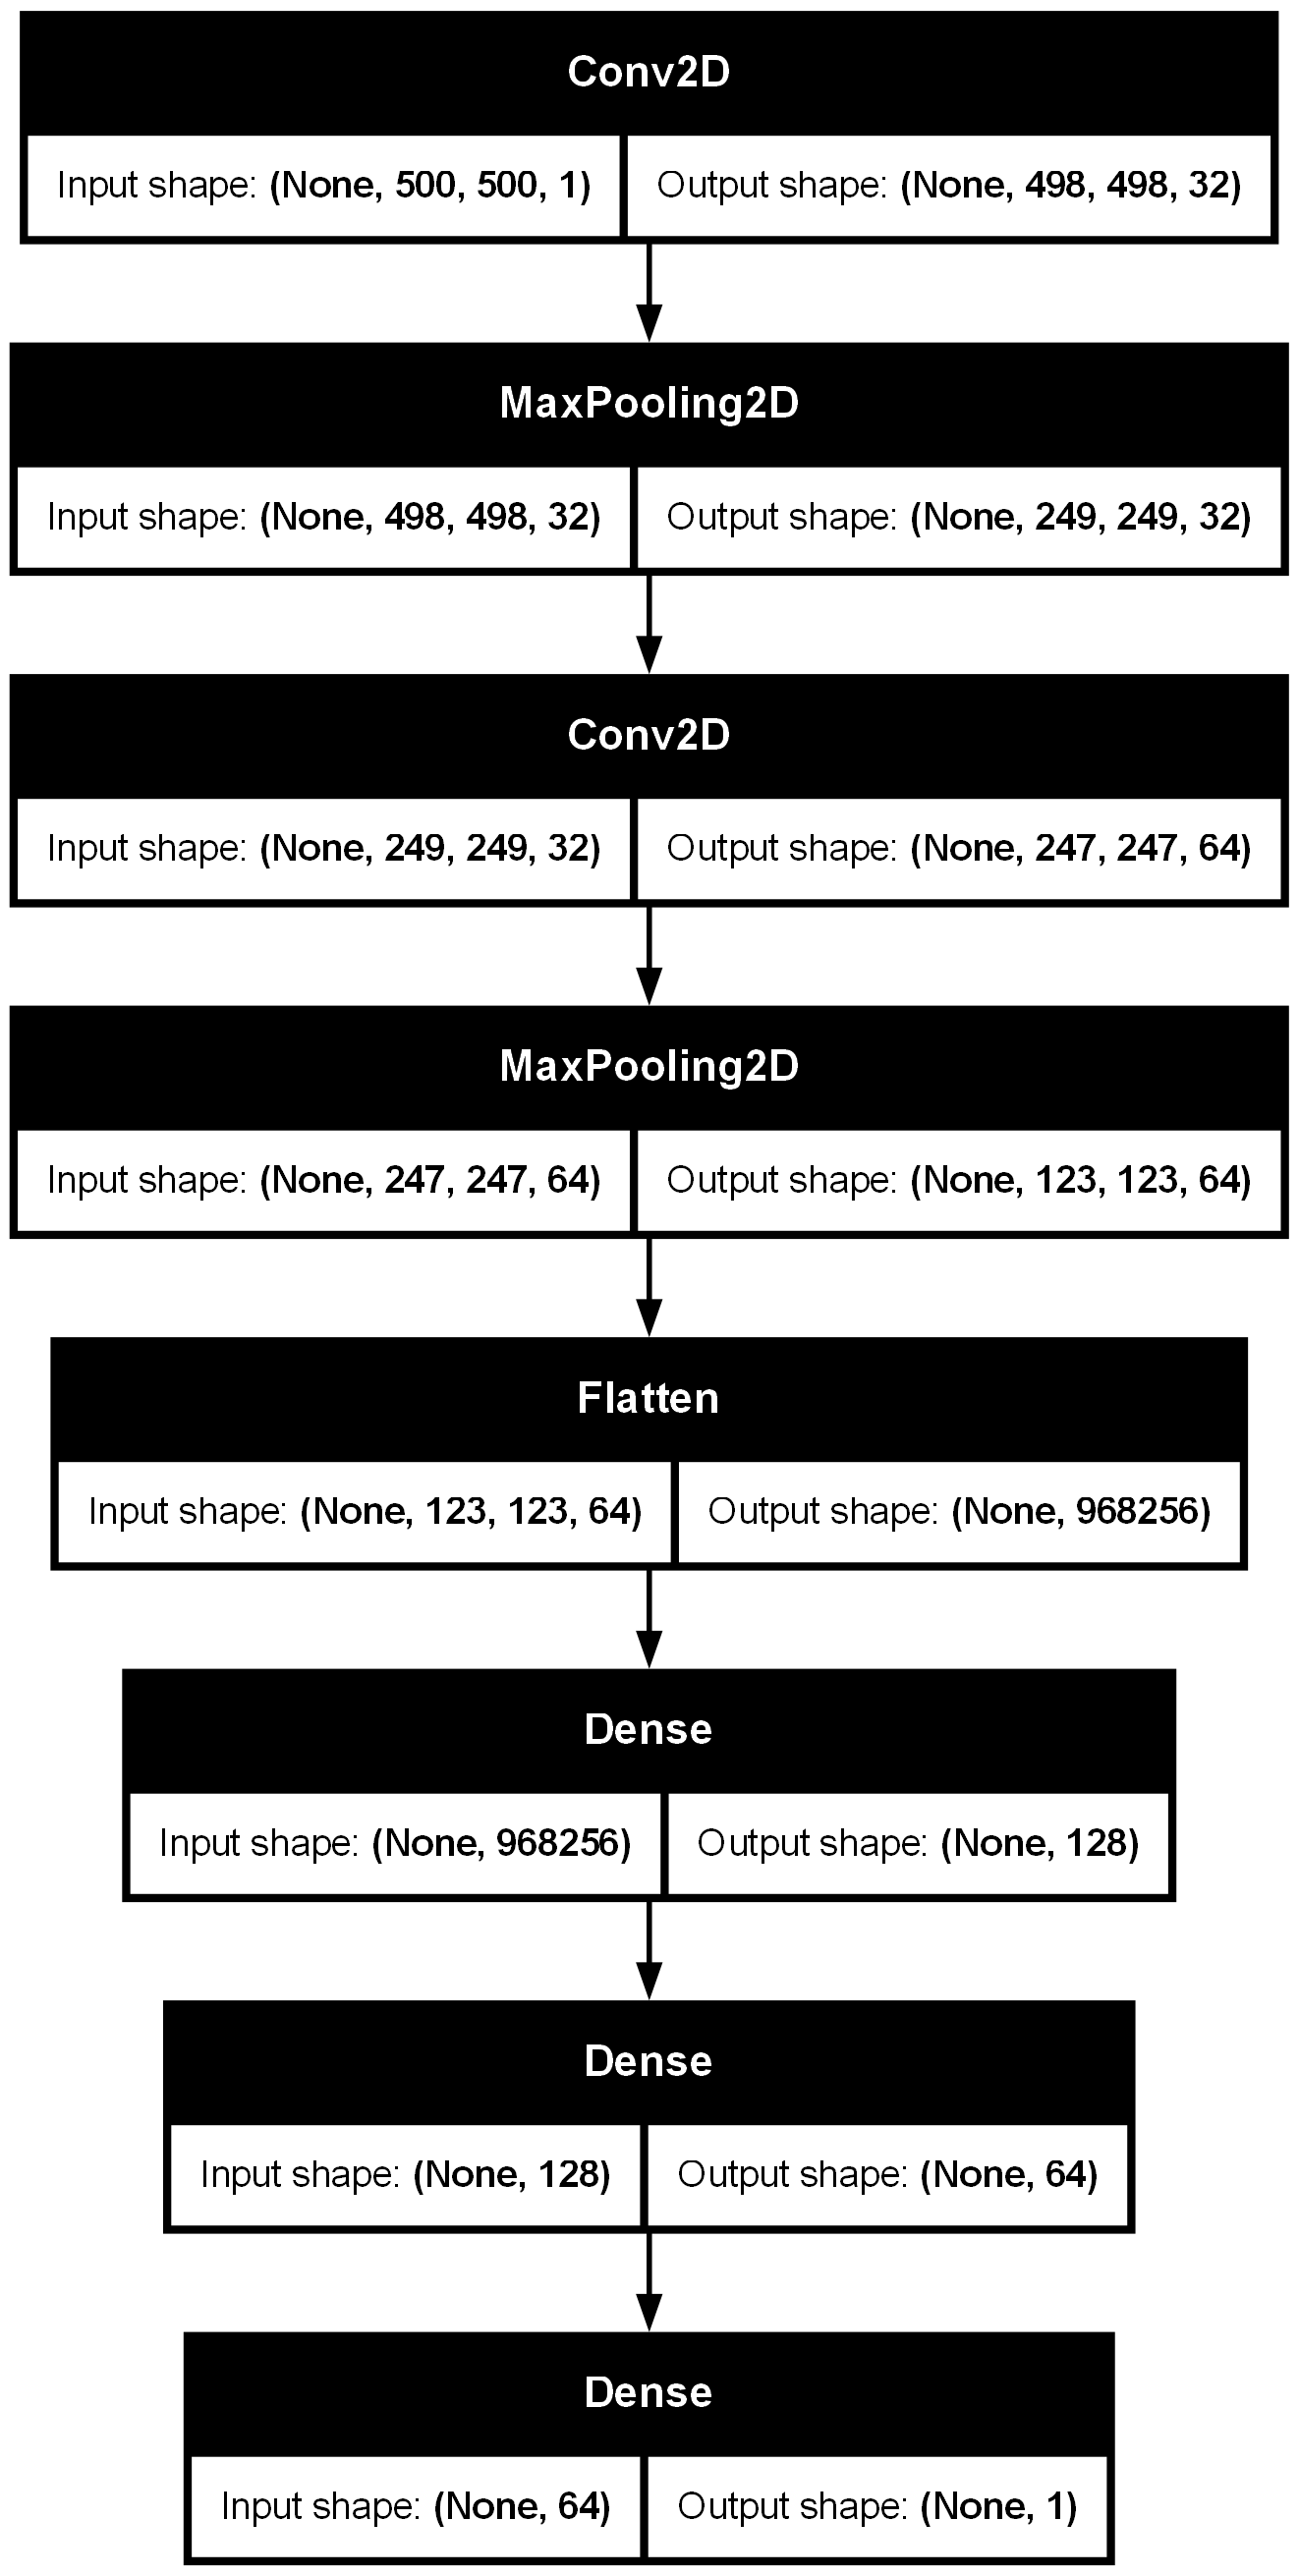

In [134]:
plot_model(model, show_shapes=True, show_layer_names=False)



In [135]:
train_data.classes

array([0, 0, 0, ..., 1, 1, 1], shape=(3585,), dtype=int32)

In [136]:
from sklearn.utils.class_weight import compute_class_weight
xx=compute_class_weight(class_weight='balanced', classes=np.unique(train_data.classes), y=train_data.classes)
print(xx)

[1.32876205 0.80165474]


In [137]:
classwehigt=dict(zip(np.unique(train_data.classes), xx))
classwehigt

{np.int32(0): np.float64(1.3287620459599703),
 np.int32(1): np.float64(0.8016547406082289)}

In [138]:
es=EarlyStopping(monitor='val_loss', patience=3,mode='min')
rlrop=ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

In [139]:
from tensorflow.keras.callbacks import ModelCheckpoint
mch=ModelCheckpoint('chestxray.weights.h5',monitor='val_loss',mode='min',save_best_only=True,save_weights_only=True)

In [140]:
history=model.fit(train_data,steps_per_epoch=len(train_data),epochs=30,validation_data=test_data,validation_steps=len(test_data),callbacks=[es,rlrop,mch],class_weight=classwehigt)

Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 463s 6s/step - accuracy: 0.6993 - loss: 1.4266 - val_accuracy: 0.7393 - val_loss: 0.5748 - learning_rate: 0.0010
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 489s 7s/step - accuracy: 0.8594 - loss: 0.3252 - val_accuracy: 0.8547 - val_loss: 0.3731 - learning_rate: 0.0010
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 215s 3s/step - accuracy: 0.8870 - loss: 0.2819 - val_accuracy: 0.8397 - val_loss: 0.4015 - learning_rate: 0.0010
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.9054 - loss: 0.2378 - val_accuracy: 0.8782 - val_loss: 0.3404 - learning_rate: 0.0010
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9013 - loss: 0.2464 - val_accuracy: 0.8590 - val_loss: 0.3398 - learning_rate: 0.0010
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 354s 5s/step - accuracy: 0.8976 - loss: 0.2450 - val_accuracy: 0.8654 - val_loss: 0.3541 - learning_rate: 0.0010
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 459s 6s/step - accuracy: 0.9113 - loss: 0.2299 - val_acc

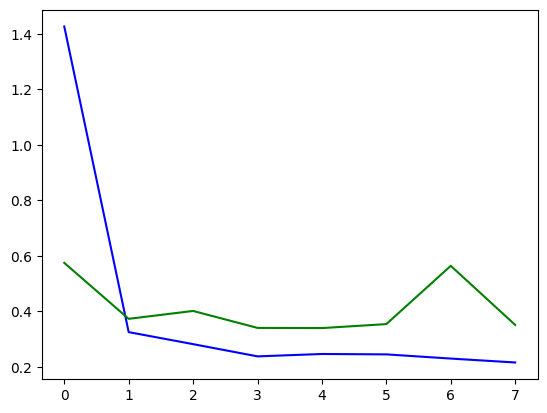

In [143]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='blue',label="train data")
plt.plot(history.history['val_loss'],color='green',label="validation data")

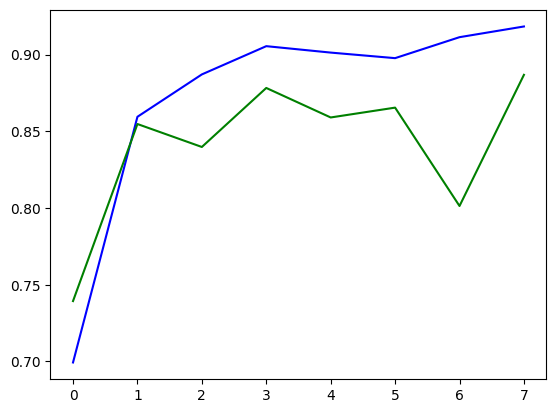

In [144]:
plt.plot(history.history['accuracy'], color='blue', label="train data")
plt.plot(history.history['val_accuracy'], color='green', label="validation data")